# SOMATOMOTOR REGION ANALYSIS

The graph is a single connected component.
Number of connected components: 1

Edge types:

 - arteriole, 2, Count: 3066
 - venule, 3, Count: 1823
 - capillary, 4, Count: 133223

Average diameter by nkind:

nkind = 2: average diameter = 12.046269 μm
nkind = 3: average diameter = 14.124978 μm
nkind = 4: average diameter = 6.967227 μm

 Average lenght by nkind:

nkind = 2: average length (att) = 18.729289 μm
nkind = 3: average length (att) = 15.475041 μm
nkind = 4: average length (att) = 21.726751 μm

 Degrees of nodes: [1 2 3 4 5 6 7 8]
High-degree nodes (> 4): 6481

High-degree nodes analyzed: 6481
Node 817 -> distance to surface = 34.96 µm
Node 1911 -> distance to surface = 35.41 µm
Node 2287 -> distance to surface = 10.05 µm
Node 3206 -> distance to surface = 4.36 µm
Node 3555 -> distance to surface = 42.45 µm
Node 4525 -> distance to surface = 1.41 µm
Node 4653 -> distance to surface = 2.24 µm
Node 4726 -> distance to surface = 21.12 µm
Node 5974 -> distance to surface = 7.07 µm
Node

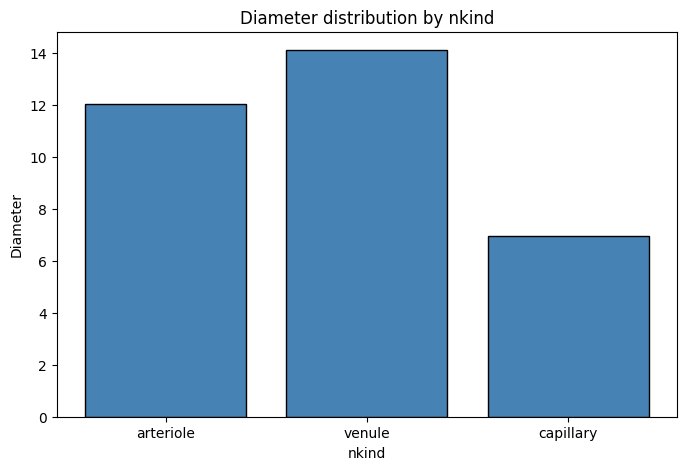

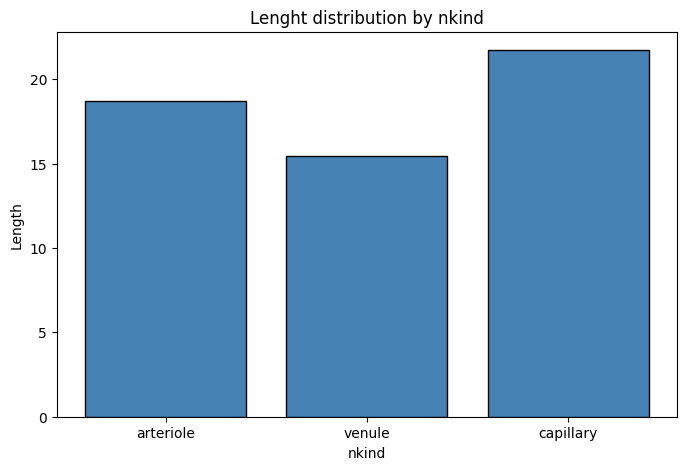

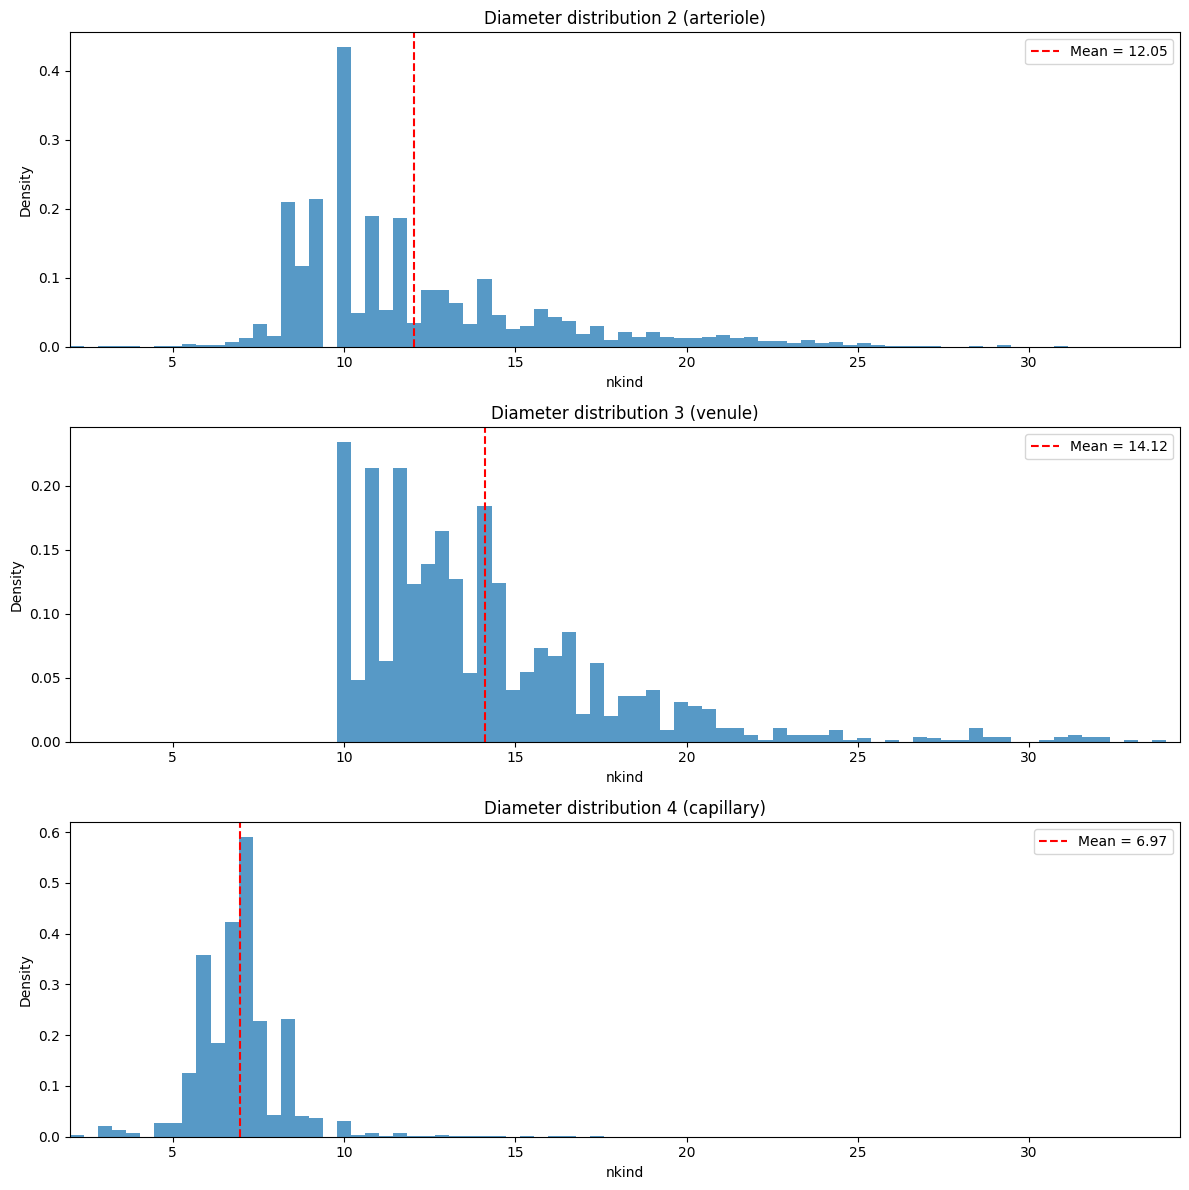

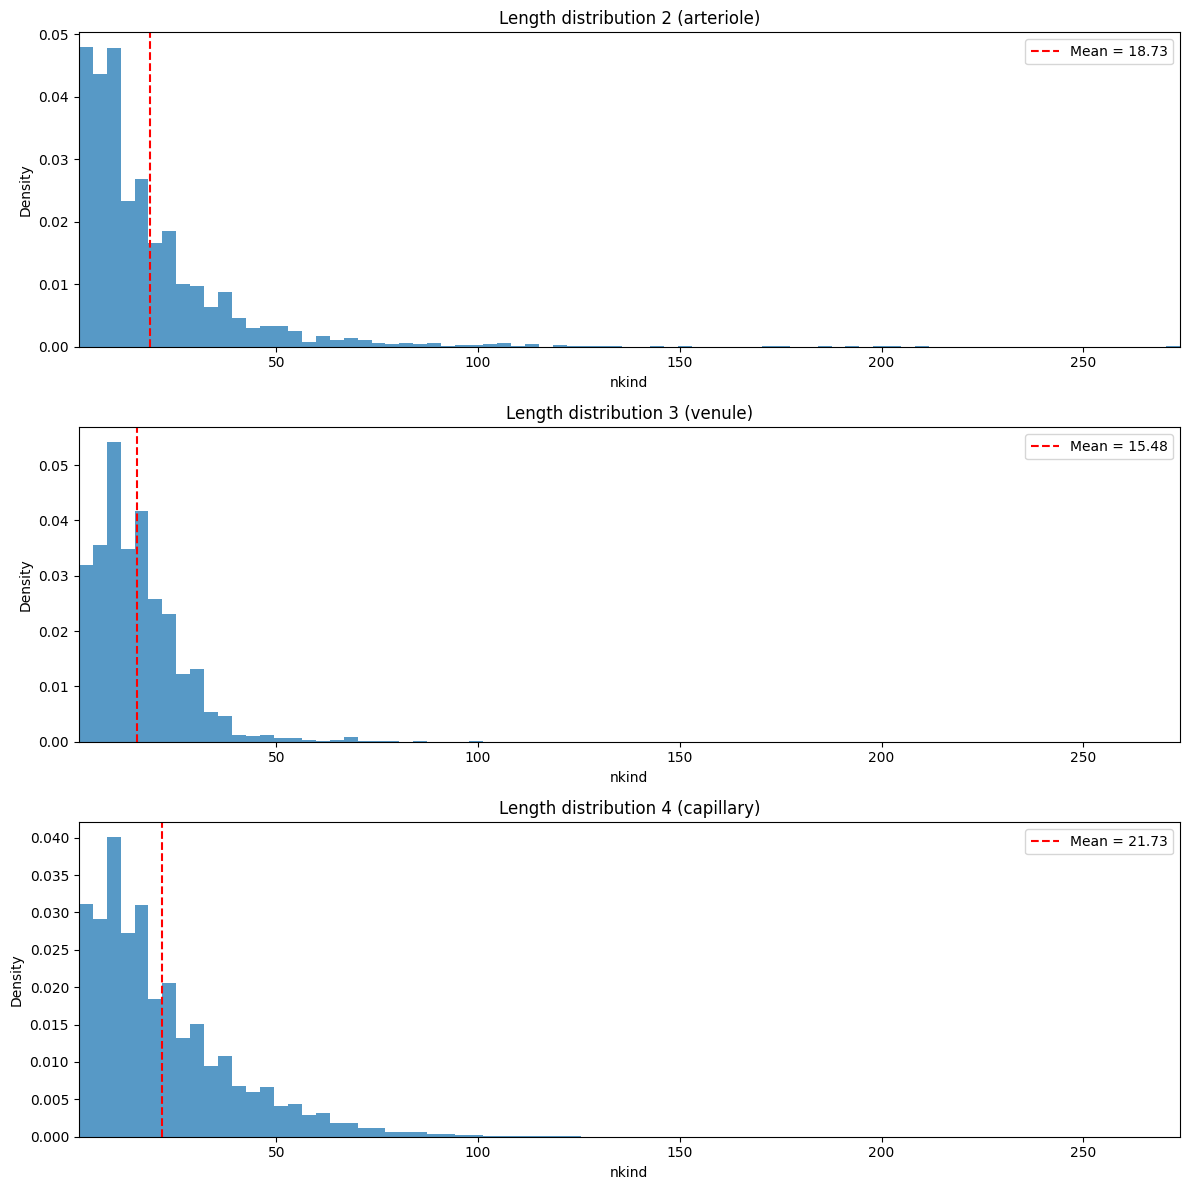


Graph successfully saved to: C:\Users\Ana\OneDrive\Escritorio\ARTORG\igraph\half brain scripts\18_igraph_CUT_SomatomotorArea_UPDATED.pkl


In [4]:
import importlib
import graph_analysis_functions as gaf
importlib.reload(gaf)
import numpy as np


path = r"C:\Users\Ana\OneDrive\Escritorio\ARTORG\igraph\half brain scripts\18_igraph_CUT_SomatomotorArea.pkl"
data = gaf.load_graph(path)

vessel_type = {
    2: "arteriole",
    3: "venule",
    4: "capillary"
}

nkind = np.unique(np.array(data.es["nkind"]))

connected_soma = gaf.single_connected_component(data)
edges_types_soma = gaf.get_edges_types(data)
diameters_soma= gaf.get_diameter_nkind(data)
lengths_soma   = gaf.get_length_nkind(data)
degrees_soma   = gaf.get_degrees(data)
gaf.get_location_degrees(data, degrees_soma[1])

duplicates_soma = gaf.find_duplicated_edges(data)

plot_diamMean_soma = gaf.plot_category_stats(categ = nkind, attribute_toplot=diameters_soma, label_dict= vessel_type, xlabel="nkind", ylabel="Diameter", title = "Diameter distribution by nkind")
plot_lengthMean_soma = gaf.plot_category_stats(categ=nkind, attribute_toplot=lengths_soma, label_dict= vessel_type, xlabel="nkind", ylabel="Length", title = "Lenght distribution by nkind")


diameters_dist_soma= np.array(data.es["diameter"])
lengths_dist_soma = np.array(data.es["length"])

nkind_distribution = np.array(data.es["nkind"])
hist_diam_soma = gaf.plot_histograms_by_category(diameters_dist_soma, nkind_distribution, label_dict=vessel_type, xlabel="nkind", plot_title="Diameter distribution")
hist_length_soma = gaf.plot_histograms_by_category(lengths_dist_soma, nkind_distribution, label_dict=vessel_type, xlabel="nkind", plot_title="Length distribution")

# Save graph with new attributes
gaf.dump_graph(data, r"C:\Users\Ana\OneDrive\Escritorio\ARTORG\igraph\half brain scripts\18_igraph_CUT_SomatomotorArea_UPDATED.pkl")